# Zadania z aproksymacji wielomianowej.

## Zadanie 3

Zacznijmy od wprowadzenia danych:


In [3]:
X = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
Y = [1.02, 0.62, 0.5, 0.6, 0.98, 1.55, 3.12, 5.08];
m = 2;

Zdefiniujmy funkcję, które pozwolą nam policzyć $S$ i $t$:

In [4]:
getS(x,m) = [sum(x.^(i+j)) for i = 0:m, j = 0:m]
gett(x,y,m) = transpose([y'*x.^k for k = 0:m])
fitpoly(x,y,m) = gett(x,y,m)/getS(x,m)

fitpoly (generic function with 1 method)

Wyznaczmy wartości $S$ i $t$ dla pierwszego przypadku:

In [5]:
S₁ = getS(X,m)


3×3 Matrix{Float64}:
  8.0  14.0   35.0
 14.0  35.0   98.0
 35.0  98.0  292.25

In [6]:
t₁ = gett(X,Y,m)

1×3 transpose(::Vector{Float64}) with eltype Float64:
 13.47  34.685  105.922

rozwiążmy zadanie:

In [7]:
#a₁=t₁/S₁
a₁ = fitpoly(X,Y,m)

1×3 transpose(::Vector{Float64}) with eltype Float64:
 1.18125  -1.64083  0.77119

Zajmijmy się drugim przypadkiem:

In [8]:
X₂=X[X .!= 2.5]
Y₂ = Y[Y .!= Y[findfirst(x -> x == 2.5,X)]];

In [9]:
S₂ = getS(X₂,m)
t₂ = gett(X₂,Y₂,m);

In [10]:
#a₂=t₂/S₂
a₂ = fitpoly(X₂,Y₂,m)

1×3 transpose(::Vector{Float64}) with eltype Float64:
 1.12442  -1.4947  0.738715

Policzmy błąd

In [11]:
fitdata(X,m,a) = reduce(hcat,[X.^i for i = 0:m])  *  a' 

fitdata (generic function with 1 method)

In [12]:
MSE(Ŷ,Y) = sum((Ŷ - Y).^2)

MSE (generic function with 1 method)

In [13]:
MSE(fitdata(X₂,m,a₁),Y₂)

0.13106765518707486

In [14]:
MSE(fitdata(X₂,m,a₂),Y₂)

0.09422148394241406

Narysujmy wykres:

In [16]:
using Plots; pyplot()
using LaTeXStrings

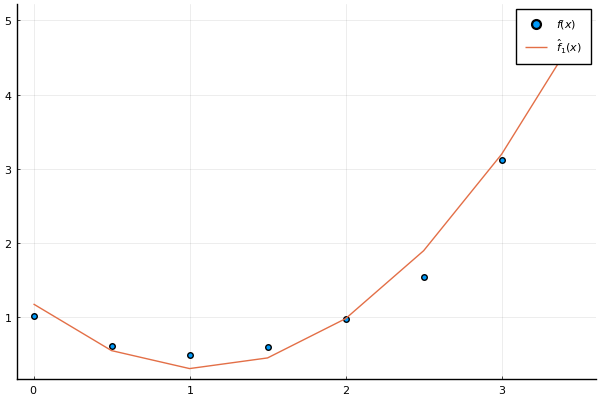

In [17]:
scatter(X,Y, label = L"$f(x)$")
plot!(X, fitdata(X,m,a₁),label = L"$\hat{f}_1(x)$")

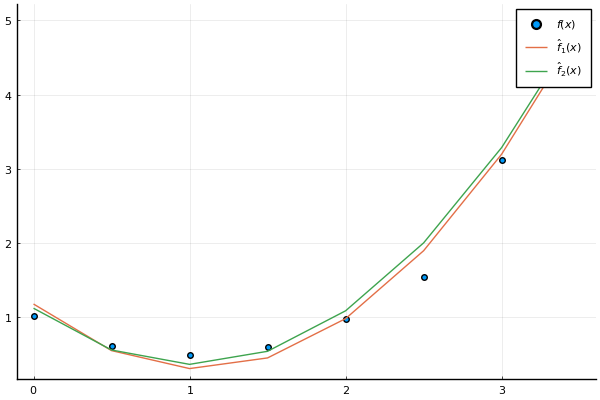

In [18]:
plot!(X, fitdata(X,m,a₂),label = L"$\hat{f}_2(x)$")

## Zadanie

Porównajmy jakość aproksymacji dla wielomanu zbudowanego z większej ilości punktów (zadanie zaadopotwane z podręcznika [Introduction to Applied Linear Algebra – Vectors, Matrices, and Least Square Introduction to Applied Linear Algebra – Vectors, Matrices, and Least Squares, strona 102](https://web.stanford.edu/~boyd/vmls/vmls-julia-companion.pdf))

In [19]:
# Generate data in the interval [-1, 1].
using Random; Random.seed!(232)
m = 100;
t = -1 .+ 2*rand(m);
y = t.^3 - t + 0.4 ./ (1 .+ 25*t.^2) + 0.10*randn(m);

Pokażmy dane na wykresie:

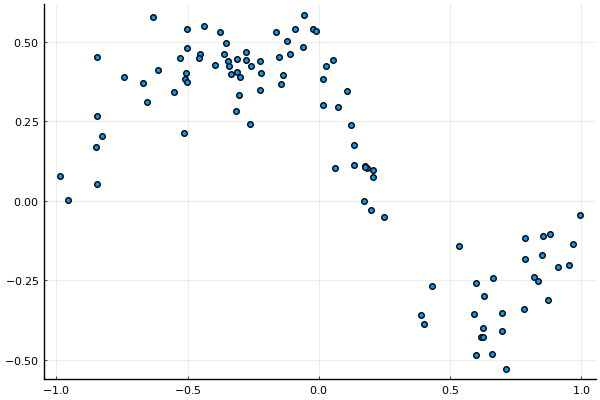

In [20]:
using Plots
scatter(t,y,legend=false)

Dopasujmy wielomiany stopnia 2, 6, 10, 15 do danych treningowych:

In [21]:
α₂ = fitpoly(t,y,2)
α₆ = fitpoly(t,y,6)
α₁₀ = fitpoly(t,y,10)
α₁₅ = fitpoly(t,y,15);


Wygenerujmy wykresy:

In [24]:
t_plot = range(-1,1,1000);

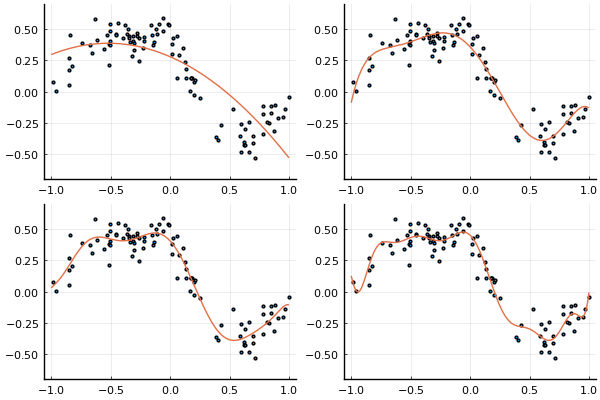

In [29]:
p = plot(layout=4, legend=false, ylim=(-0.7, 0.7));
scatter!(t, y, subplot=1, markersize = 2)
plot!(t_plot, fitdata(t_plot,2,α₂), subplot=1)
scatter!(t, y, subplot=2, markersize = 2)
plot!(t_plot, fitdata(t_plot,6,α₆), subplot=2)
scatter!(t, y, subplot=3, markersize = 2)
plot!(t_plot, fitdata(t_plot,10,α₁₀), subplot=3)
scatter!(t, y, subplot=4, markersize = 2)
plot!(t_plot, fitdata(t_plot,15,α₁₅), subplot=4)

Ostatecznie, policzmy błąd na zbiorze testowym:

In [30]:
#Generate the test set.
m = 100;
t_test = -1 .+ 2*rand(m,1)
y_test = t_test.^3 - t_test + 0.4 ./ (1 .+ 25*t_test.^2) + 0.10*randn(m,1);


In [31]:
error_train = zeros(21);
error_test = zeros(21);

In [33]:
for p = 1:21
    α = fitpoly(t,y,p)
    error_train[p] = MSE(fitdata(t,p,α),y) 
    error_test[p] = MSE(fitdata(t_test,p,α),y_test) 
end


Wygenerujmy wykres:

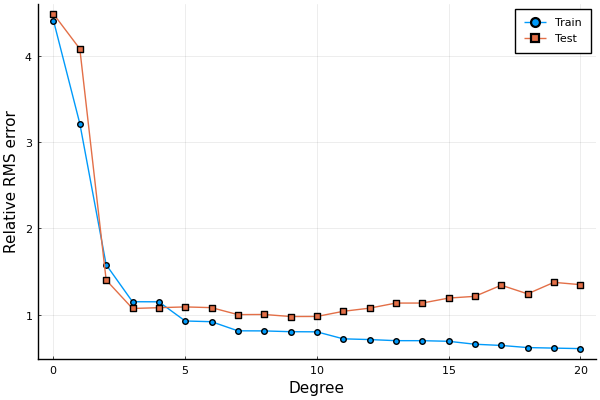

In [34]:
plot(0:20, error_train, label = "Train", marker = :circle)
plot!(0:20, error_test, label = "Test", marker = :square)
plot!(xlabel="Degree", ylabel = "Relative RMS error")